In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchview import draw_graph
import os

from common import h5dataset, onnxexporter, model_dnn, trainer


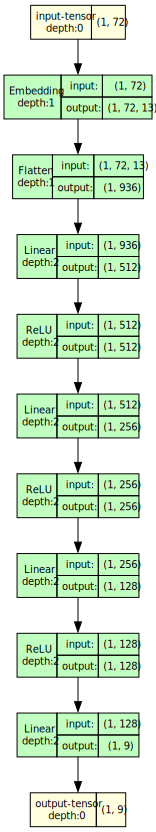

In [ ]:
# Plot model graph
model = model_dnn.ModelDNN(
    name="JassPlayCheated",
    input_size=72,
    embedding_size=13,
    hidden_size=[512, 256, 128],
    output_size=9,
)
model_graph = draw_graph(model, torch.zeros(1, 72).long(), show_shapes=True)
model_graph.visual_graph

In [3]:
DATASET_PATH = '../log_parser/dataset/flat_playing_cheated.hdf5'
if not os.path.exists(DATASET_PATH):
    raise FileNotFoundError(f"Dataset not found at {DATASET_PATH}")

MODLE_PATH = './models/play_cheated'
if not os.path.exists(MODLE_PATH):
    os.makedirs(MODLE_PATH)

LOGS_PATH = './logs/play_cheated'
if not os.path.exists(LOGS_PATH):
    os.makedirs(LOGS_PATH)

In [4]:
BATCH_SIZE = 256
NUM_EPOCHS = 20
LEARNING_RATE = 1e-3
SEED = 42

torch.manual_seed(SEED)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Load dataset
dataset = h5dataset.H5Dataset(DATASET_PATH)
train_dataset, val_dataset = dataset.split(0.8)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=8)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False, num_workers=8)


accuracy_fn = lambda y_pred, y_true: (y_pred.argmax(dim=1) == y_true).float().mean()
loss_fn = lambda y_pred, y_true: F.nll_loss(F.log_softmax(y_pred, dim=1), y_true)

# set up trainer
trainer = trainer.Trainer(
    train_loader=train_loader,
    val_loader=val_loader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    model_path=MODLE_PATH,
    device=device
)

Using device: cuda


In [5]:
# train the model
model = model.to(device)
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
trainer.train(NUM_EPOCHS, model, optimizer)

Training model: JassPlayWithScore_512_256_128_dnn


Validation Epoch 1: 100%|██████████| 17326/17326 [01:05<00:00, 263.51it/s]


Epoch 1/20 - Train Loss: 0.7285, Train Accuracy: 69.5142, Val Loss: 0.6475, Val Accuracy: 73.1899
Model saved at epoch 1 with validation loss 0.6475


Validation Epoch 2: 100%|██████████| 17326/17326 [01:01<00:00, 279.57it/s]


Epoch 2/20 - Train Loss: 0.6174, Train Accuracy: 74.6498, Val Loss: 0.6005, Val Accuracy: 75.4795
Model saved at epoch 2 with validation loss 0.6005


Validation Epoch 3: 100%|██████████| 17326/17326 [01:02<00:00, 279.06it/s]


Epoch 3/20 - Train Loss: 0.5849, Train Accuracy: 76.1819, Val Loss: 0.5796, Val Accuracy: 76.4338
Model saved at epoch 3 with validation loss 0.5796


Validation Epoch 4: 100%|██████████| 17326/17326 [01:02<00:00, 277.93it/s]


Epoch 4/20 - Train Loss: 0.5705, Train Accuracy: 76.8257, Val Loss: 0.5711, Val Accuracy: 76.7849
Model saved at epoch 4 with validation loss 0.5711


Validation Epoch 5: 100%|██████████| 17326/17326 [01:01<00:00, 282.66it/s]


Epoch 5/20 - Train Loss: 0.5624, Train Accuracy: 77.1953, Val Loss: 0.5649, Val Accuracy: 77.0442
Model saved at epoch 5 with validation loss 0.5649


Validation Epoch 6: 100%|██████████| 17326/17326 [01:01<00:00, 282.22it/s]


Epoch 6/20 - Train Loss: 0.5572, Train Accuracy: 77.4248, Val Loss: 0.5606, Val Accuracy: 77.3140
Model saved at epoch 6 with validation loss 0.5606


Validation Epoch 7: 100%|██████████| 17326/17326 [01:01<00:00, 280.64it/s]


Epoch 7/20 - Train Loss: 0.5535, Train Accuracy: 77.5980, Val Loss: 0.5591, Val Accuracy: 77.3487
Model saved at epoch 7 with validation loss 0.5591


Validation Epoch 8: 100%|██████████| 17326/17326 [01:01<00:00, 279.79it/s]


Epoch 8/20 - Train Loss: 0.5509, Train Accuracy: 77.7198, Val Loss: 0.5582, Val Accuracy: 77.3887
Model saved at epoch 8 with validation loss 0.5582


Validation Epoch 9: 100%|██████████| 17326/17326 [01:01<00:00, 280.45it/s]


Epoch 9/20 - Train Loss: 0.5487, Train Accuracy: 77.8264, Val Loss: 0.5541, Val Accuracy: 77.5901
Model saved at epoch 9 with validation loss 0.5541


Validation Epoch 10: 100%|██████████| 17326/17326 [01:01<00:00, 281.93it/s]


Epoch 10/20 - Train Loss: 0.5471, Train Accuracy: 77.9102, Val Loss: 0.5549, Val Accuracy: 77.6285


Validation Epoch 11: 100%|██████████| 17326/17326 [01:01<00:00, 279.63it/s]


Epoch 11/20 - Train Loss: 0.5458, Train Accuracy: 77.9695, Val Loss: 0.5522, Val Accuracy: 77.7322
Model saved at epoch 11 with validation loss 0.5522


Validation Epoch 12: 100%|██████████| 17326/17326 [01:02<00:00, 278.65it/s]


Epoch 12/20 - Train Loss: 0.5447, Train Accuracy: 78.0267, Val Loss: 0.5521, Val Accuracy: 77.7482
Model saved at epoch 12 with validation loss 0.5521


Validation Epoch 13: 100%|██████████| 17326/17326 [01:01<00:00, 280.37it/s]


Epoch 13/20 - Train Loss: 0.5438, Train Accuracy: 78.0787, Val Loss: 0.5502, Val Accuracy: 77.8080
Model saved at epoch 13 with validation loss 0.5502


Validation Epoch 14: 100%|██████████| 17326/17326 [01:01<00:00, 282.37it/s]


Epoch 14/20 - Train Loss: 0.5432, Train Accuracy: 78.1155, Val Loss: 0.5513, Val Accuracy: 77.7430


Validation Epoch 15: 100%|██████████| 17326/17326 [01:02<00:00, 277.25it/s]

Epoch 15/20 - Train Loss: 0.5424, Train Accuracy: 78.1427, Val Loss: 0.5524, Val Accuracy: 77.8103


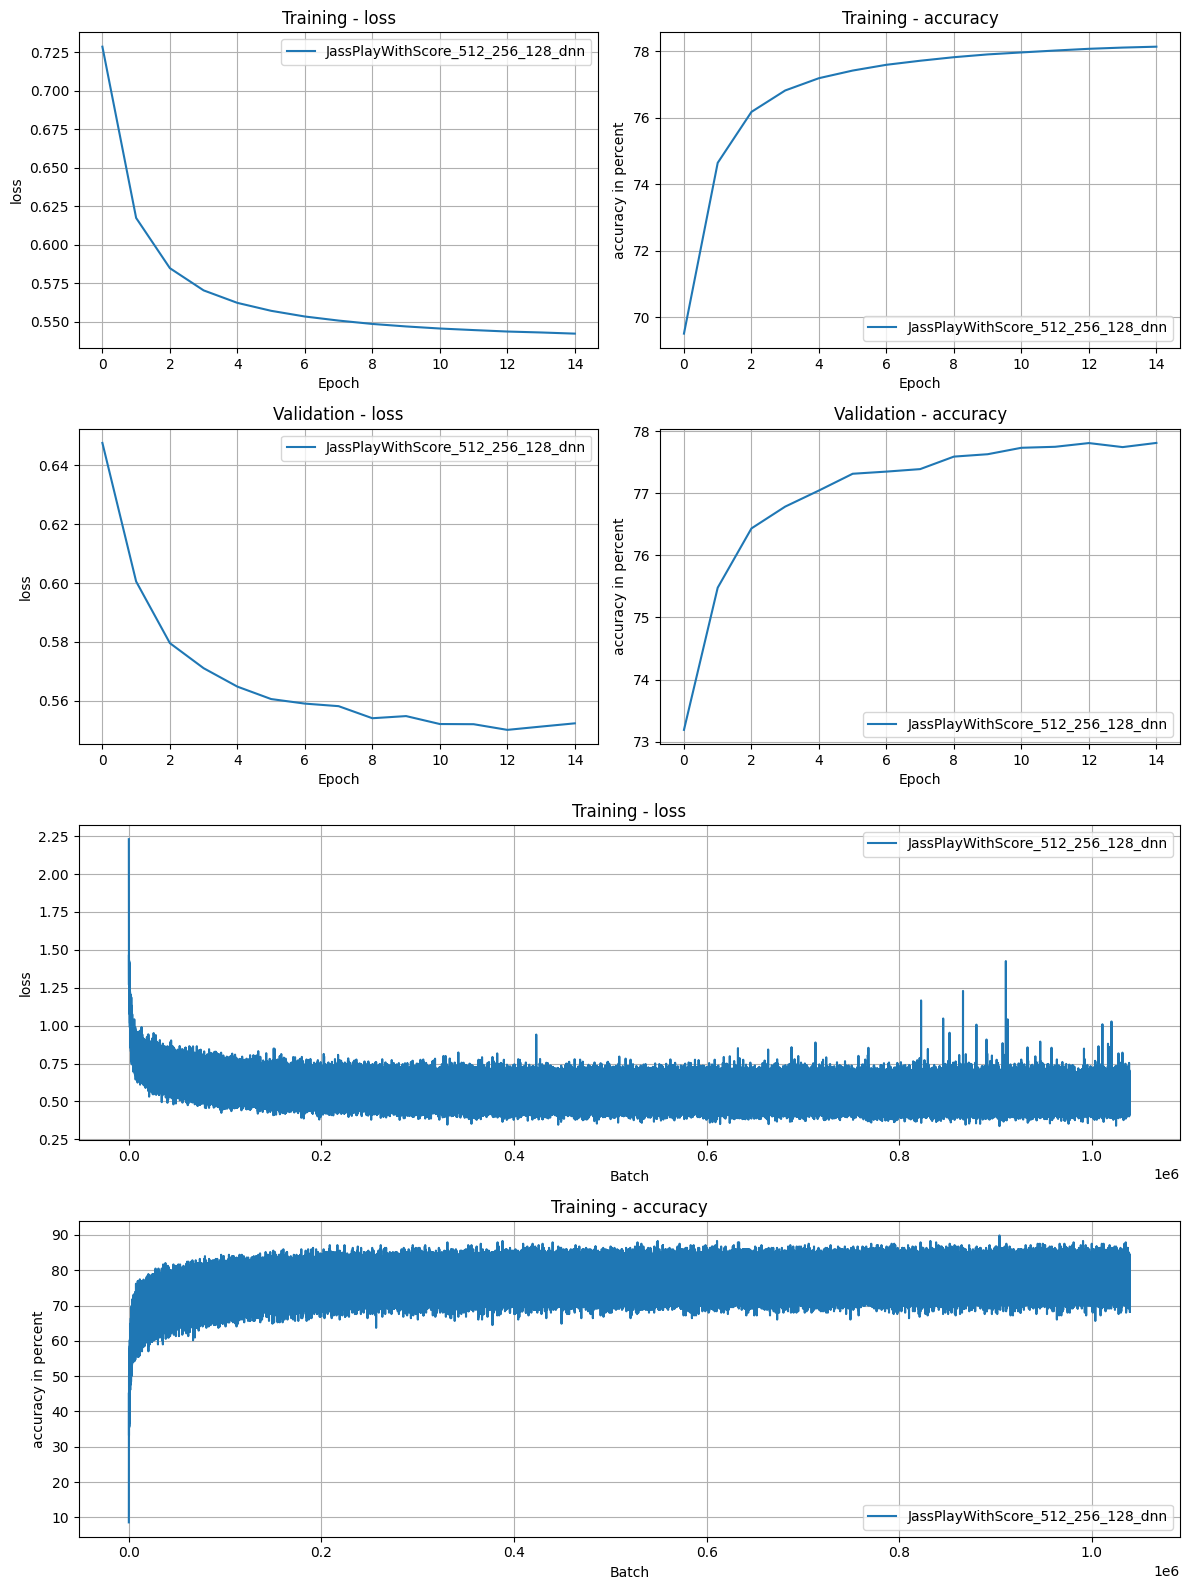

In [6]:
# create graphs
trainer.monitor.plot()

In [7]:
trainer.monitor.dump(dump_path=LOGS_PATH, filename="monitor")

In [9]:
# export the model to ONNX
model = model.to("cpu")
ONNX_PATH = f"{MODLE_PATH}/{model.name}.onnx"
onnxexporter.onnx_exporter(
    model=model,
    in_dim=72,
    decision_fn=F.log_softmax,
    output_path=ONNX_PATH
)

Exporting model to ONNX format...
Successfully converted and saved ONNX model to ./models/play_cheated/JassPlayWithScore_512_256_128_dnn.onnx
